# Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
save_path = os.path.join('drive', 'MyDrive', 'emotone', 'images')

In [3]:
emotions = {1:'joy', 2:'sad', 3:'relax', 4:'distress'}

## Analysis of the dataset

In [ ]:
data_path = os.path.join('drive', 'MyDrive', 'emotone', 'vgmidi', 'sentiment_labelled.csv')

In [ ]:
dataset = pd.read_csv(data_path)
dataset

,piece,name,midi,measures,duration,arousal,valence,emotion
0,piece_0,Lurking In The Darkness,Final Fantasy_PS1_Final Fantasy VII_Lurking In...,32,63,-0.032802,-0.203875,2
1,piece_1,Continue?,Final Fantasy_PS1_Final Fantasy VII_Continue.mid,25,74,-0.207000,0.151760,3
2,piece_2,Oppressed People,Final Fantasy_PS1_Final Fantasy VII_Oppressed ...,40,70,0.058008,-0.138137,4
3,piece_3,Deku Palace,The Legend of Zelda_N64_The Legend of Zelda Ma...,60,131,0.189081,0.446306,1
4,piece_4,Holding My Thoughts in My Heart,Final Fantasy_PS1_Final Fantasy VII_Holding My...,34,116,-0.211324,0.240137,3
...,...,...,...,...,...,...,...,...
195,piece_195,Maguss Theme,Chrono_SNES_Chrono Trigger_Maguss Theme.mid,71,149,0.147208,-0.019774,4
196,piece_196,Zeppelin,Indiana Jones_PC_Indiana Jones and the Last Cr...,35,69,0.097327,0.300337,1
197,piece_197,JENOVA,Final Fantasy_PS1_Final Fantasy VII_JENOVA.mid,100,133,0.376296,0.012214,1
198,piece_198,Isle O Hags Cauldron Keep,Banjo-Kazooie_N64_Banjo-Tooie_Isle O Hags Caul...,62,123,-0.012431,-0.094902,2


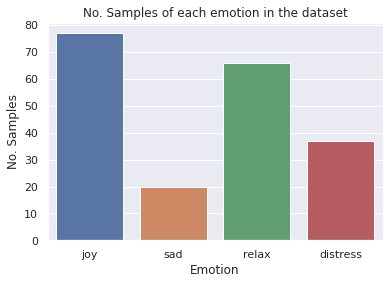

In [ ]:
plt.figure()
sns.barplot(x=list(emotions.values()), y=list(dataset.emotion.value_counts().sort_index()))
plt.xlabel('Emotion')
plt.ylabel('No. Samples')
plt.title('No. Samples of each emotion in the dataset')
plt.savefig(os.path.join(save_path, 'dataset_bar_plot.png'))
plt.show()

In [ ]:
sns.set()

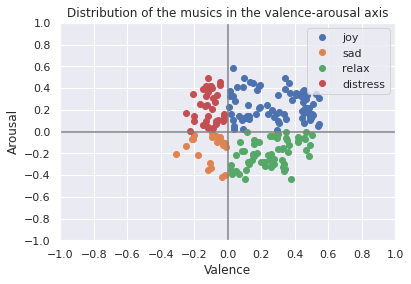

In [ ]:
plt.figure()
for index, emotion in emotions.items():
    plt.plot(dataset[dataset.emotion == index]['valence'], dataset[dataset.emotion == index]['arousal'], 'o', label=emotion)
plt.legend()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))
plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')
plt.title('Distribution of the musics in the valence-arousal axis')
plt.savefig(os.path.join(save_path, 'musics_distribution.png'))
plt.show()

## Analysis of the generated musics

In [133]:
path = os.path.join('drive', 'MyDrive', 'emotone', 'generated', 'music_classification.csv')

In [134]:
evaluation_path = os.path.join(os.path.join('drive', 'MyDrive', 'emotone', 'results', 'evaluation.csv'))

In [135]:
data =  pd.read_csv(path)
data['users_prediction'] = pd.Series(np.zeros((data.shape[0],))).astype(int)
data

,music,given_emotion,prediction,users_prediction
0,music_0.mid,4,1,0
1,music_1.mid,4,4,0
2,music_2.mid,4,4,0
3,music_3.mid,4,1,0
4,music_4.mid,4,1,0
5,music_5.mid,3,1,0
6,music_6.mid,3,1,0
7,music_7.mid,3,1,0
8,music_8.mid,3,1,0
9,music_9.mid,3,1,0


In [136]:
map_indexes = {
    'music_9.mid' : 1,
    'music_3.mid' : 2,
    'music_12.mid': 3,
    'music_10.mid' : 4,
    'music_5.mid' : 5,
    'music_18.mid' : 6,
    'music_6.mid' : 7,
    'music_16.mid' : 8,
    'music_4.mid' : 9,
    'music_13.mid' :10,
    'music_1.mid' :11,
    'music_15.mid' : 12,
}

In [137]:
selected_musics_indexes = [9, 3, 12, 10, 5, 18, 6, 16, 4, 13, 1, 15]

### Classifier

In [138]:
selected_musics = [f'music_{id}.mid' for id in selected_musics_indexes]

<Figure size 432x288 with 0 Axes>

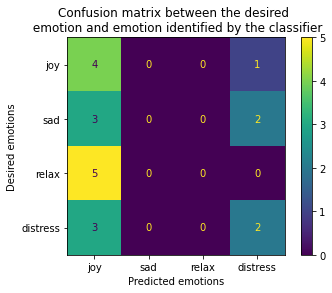

In [139]:
plt.figure()
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(data.given_emotion, data.prediction), display_labels=list(emotions.values())).plot()
# plt.title('Confusion matrix between the emotion given to the \n generated songs and the emotion predicted by the classifier')
plt.xlabel('Predicted emotions')
plt.ylabel('Desired emotions')
plt.title('Confusion matrix between the desired \n emotion and emotion identified by the classifier')
plt.savefig(os.path.join(save_path, 'classifier_confusion_matrix.png'))

In [140]:
print('Accuracy:', metrics.accuracy_score(data.given_emotion, data.prediction)*100)

Accuracy: 30.0


In [141]:
data = data[data.music.isin(selected_musics)].copy()
data

,music,given_emotion,prediction,users_prediction
1,music_1.mid,4,4,0
3,music_3.mid,4,1,0
4,music_4.mid,4,1,0
5,music_5.mid,3,1,0
6,music_6.mid,3,1,0
9,music_9.mid,3,1,0
10,music_10.mid,2,4,0
12,music_12.mid,2,4,0
13,music_13.mid,2,1,0
15,music_15.mid,1,4,0


<Figure size 432x288 with 0 Axes>

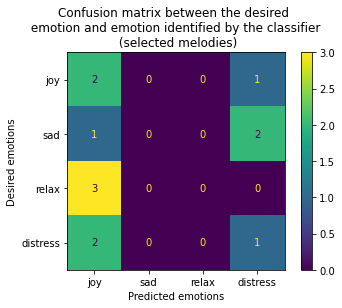

In [142]:
plt.figure()
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(data.given_emotion, data.prediction), display_labels=list(emotions.values())).plot()
# plt.title('Confusion matrix between the emotion given to the \n generated songs and the emotion predicted by the classifier')
plt.xlabel('Predicted emotions')
plt.ylabel('Desired emotions')
plt.title('Confusion matrix between the desired \n emotion and emotion identified by the classifier \n (selected melodies)')
plt.savefig(os.path.join(save_path, 'classifier_confusion_matrix_selected.png'))

### Users

In [143]:
evaluation = pd.read_csv(evaluation_path)
evaluation

,Timestamp,Idade,Género,Conhecimento musical,1,2,3,4,5,6,...,9,10,11,12,13,"Em que medida, as músicas geradas pelo sistema são novidade para si?",Ouviria as músicas apresentadas novamente?,Ficou surpreendid@ com as músicas geradas?,"Numa escala de 1 a 5, como avalia a criatividade do sistema de IA?",Deixe aqui eventuais observações que queira.
0,2022/12/10 2:12:17 PM GMT,< 25 anos,F,3,Stressante / tensa,Alegre,Stressante / tensa,Triste,Alegre,Stressante / tensa,...,Alegre,Triste,Stressante / tensa,Alegre,Calma,5,Talvez,Sim,5,NaN
1,2022/12/10 2:12:18 PM GMT,25 a 50 anos,M,2,Alegre,Triste,Stressante / tensa,Calma,Triste,Triste,...,Stressante / tensa,Alegre,Stressante / tensa,Triste,Calma,4,Talvez,Sim,2,NaN
2,2022/12/10 2:13:06 PM GMT,25 a 50 anos,F,3,Alegre,Calma,Stressante / tensa,Calma,Alegre,Stressante / tensa,...,Alegre,Alegre,Alegre,Stressante / tensa,Calma,5,Sim,Sim,4,Muito interessante.


In [144]:
map_musics = {'Alegre' : 1,
       'Triste' : 2,
       'Calma' : 3,
       'Stressante / tensa' : 4}

In [145]:
musics_columns = [f'{i}' for i in range(1, 14)]

In [146]:
musics_evaluation = evaluation[musics_columns]

In [147]:
musics_evaluation = musics_evaluation.copy()

for col in musics_columns:
  musics_evaluation[col] = musics_evaluation[col].map(map_musics)

In [148]:
musics_evaluation

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4,1,4,2,1,4,4,2,1,2,4,1,3
1,1,2,4,3,2,2,2,4,4,1,4,2,3
2,1,3,4,3,1,4,2,1,1,1,1,4,3


In [149]:
musics_prediction = [1, 3, 4, 3, 1,4, 2, 4, 1, 1, 4, 4]

In [150]:
data = data.reset_index(drop=True)
data

,music,given_emotion,prediction,users_prediction
0,music_1.mid,4,4,0
1,music_3.mid,4,1,0
2,music_4.mid,4,1,0
3,music_5.mid,3,1,0
4,music_6.mid,3,1,0
5,music_9.mid,3,1,0
6,music_10.mid,2,4,0
7,music_12.mid,2,4,0
8,music_13.mid,2,1,0
9,music_15.mid,1,4,0


In [151]:
predictions = []

In [152]:
for row in range(data.shape[0]):
  music = data.iloc[row]['music']
  predictions.append(musics_prediction[map_indexes[music] - 1])

In [153]:
data.users_prediction = predictions
data

,music,given_emotion,prediction,users_prediction
0,music_1.mid,4,4,4
1,music_3.mid,4,1,3
2,music_4.mid,4,1,1
3,music_5.mid,3,1,1
4,music_6.mid,3,1,2
5,music_9.mid,3,1,1
6,music_10.mid,2,4,3
7,music_12.mid,2,4,4
8,music_13.mid,2,1,1
9,music_15.mid,1,4,4


<Figure size 432x288 with 0 Axes>

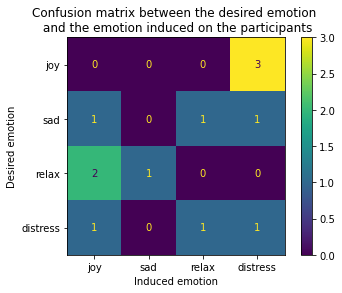

In [154]:
plt.figure()
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(data.given_emotion, data.users_prediction), display_labels=list(emotions.values())).plot()
# plt.title('Confusion matrix between the emotion given to the \n generated songs and the emotion predicted by the classifier')
plt.title('Confusion matrix between the desired emotion \n and the emotion induced on the participants')
plt.xlabel('Induced emotion')
plt.ylabel('Desired emotion')
plt.savefig(os.path.join(save_path, 'users_confusion_matrix.png'))

In [155]:
print('Accuracy:', metrics.accuracy_score(data.given_emotion, data.users_prediction)*100)

Accuracy: 8.333333333333332
